# Project 2 

In [1]:
import pandas as pd
import resources as helpers    # Has data_exploration, data_preperation and data_visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import warnings
from itertools import combinations as cm
#warnings.filterwarnings("ignore")
%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')    #Read the file
helpers.de.look_dataframe(df)    #Look at dataframe
helpers.dp.correlation_with(df, 'price')
helpers.de.look_columns(df, ['heat_source', 'sewer_system'])    # Look at the columns with missing values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Column Names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long']
Number of observation: 30155
Duplicates detected


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


N/A detected
Columns with NaN:  ['heat_source', 'sewer_system']
heat_source has 8/30155 unique observations. 
Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64
Number of missing values: 32
sewer_system has 5/30155 unique observations. 
PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64
Number of missing values: 14


,heat_source,sewer_system
0,Gas,PUBLIC
1,Oil,PUBLIC
2,Gas,PUBLIC
3,Gas,PUBLIC
4,Electricity,PUBLIC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   heat_source   30123 non-null  object
 1   sewer_system  30141 non-null  object
dtypes: object(2)
memory usage: 471.3+ KB


None

In [3]:
## Setup for columns and subsets
useful_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront'
              , 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system'
              , 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']

useless_col = ['date', 'id', 'lat', 'long', 'address']
categorical = [ 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt', 'nuisance'
               , 'view', 'condition', 'grade', 'heat_source', 'sewer_system']
continuous = [column for column in useful_col if column not in categorical]

**Column Names:** <br>
'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long'

**Useful:** <br>
'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'

**Useless:** <br>
'date', 'id', 'lat', 'long', 'address'

**Potentially Useful:** <br>
'yr_built', 'yr_renovated'

**Actions Needed**
1. Delete duplicates
2. Remove missing values
3. Remove unnecessary rows and columns
4. Remove Outliers
5. Group Small samples categories

## Data Preperations
**Main Dataframe with the least changes** <br>
df_cleaned: Removed outliers, rows, columns and replaced grade naming convention <br>
df_num: All the columns that are numbers including price <br>
df_obj: All the columns that are objects not including price <br>
**Used mainly for plotting** <br>
df_num_cat: All the columns that are categorical integers with price <br>
df_obj_cat All the columns that are categorical objects with price <br>
df_num_only All the columns that are continuous data type with price <br>
**Results with correlation (Only numerical variables)** <br>
corr_all: zip file for the correlation from df_cleaned <br>
best_corr: Dictionary of the corr_all sorted by the best correlation, cut off the last three due to usage <br>

In [4]:
df_cleaned = helpers.dp.check_and_drop(df)    ## Dropped and removed rows that has small amount of missing values
df_cleaned = helpers.dp.outliers_remove(df_cleaned, 'price')    ## Remove outliers of price
df_cleaned.drop(labels = useless_col, axis = 1, inplace = True)    # Drop columns that wont be useful right now
df_cleaned.replace(df_cleaned['grade'].value_counts().index, [7, 8,9,6,10,11, 5,12,4,13,3,2], inplace= True)

Number of Missing Values: 46
Dropping rows: heat_source
Dropping rows: sewer_system
Number of Missing Values: 0
Number of duplicates: 1
Removed 1 duplicates
Number of duplicates: 0
1214 observations were removed. 


C:\Users\Tommy\AppData\Local\Temp\ipykernel_22360\621192312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(labels = useless_col, axis = 1, inplace = True)    # Drop columns that wont be useful right now
C:\Users\Tommy\AppData\Local\Temp\ipykernel_22360\621192312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace(df_cleaned['grade'].value_counts().index, [7, 8,9,6,10,11, 5,12,4,13,3,2], inplace= True)


In [5]:
df_num, df_obj = helpers.dp.seperate_dataframe(df_cleaned)    ## Seperate the dataframe from objects and integers
num_cat = [column for column in df_num if column in categorical]    ## Number categories
obj_cat = [column for column in df_obj if column in categorical]    ## Object categories

In [6]:
df_num_cat = df_num[num_cat].copy()    ## Dataframe with the number categories
df_num_cat = pd.concat([df_num_cat, df_num['price']], axis = 1)

df_obj_cat = df_obj[obj_cat].copy()    ## Dataframe with the object categories
df_obj_cat = pd.concat([df_obj_cat, df_num['price']], axis = 1)

df_num_only = df_num[continuous].copy()    ## Dataframe with only continuous numbers

In [7]:
corr_all = zip(df_cleaned.corrwith(df_cleaned['price']).index[1:], df_cleaned.corrwith(df_cleaned['price']).values[1:])
best_corr = {x:y for x,y in corr_all}
best_corr = sorted(best_corr.items(), key =  lambda x: x[1], reverse= True)
best_corr = best_corr[0:9]

## Data Models
*Note: Categorical can't have a model created without one hot encoding* <br>
Model will be based off the top correlating attributes: <br>
Continous: 'sqft_living', 'sqft_above', 'sqft_patio', sqft_garage', 'sqft_basement' <br>
Category: 'bathrooms', 'grade', 'bedrooms',  'floors' <br>

Model_1: Only regression model with sqft_living with a .362 R2 <br>
Model_2: With both sqft_living and sqft_above with a .362 R2. **Decide to not include since but are very similar** <br>
Model_3: With sqft_living and floors - R2: .363. **Small improvement** <br>
Model_4: With sqft_living and floors and sqft_patio - R2: .367 **Bigger Improvement** <br>
Model_5  With sqft_living and floors and sqft_patio and sqft_garage - R2: .368 **Small Improvement** <br>
Model_6  With sqft_living and floors and sqft_patio and sqft_garage and sqft_basement - R2: 0.370 **Small Improvement** <br>
Model_all With all the parameter - R2: .407 **Best score** <br>

### Simple Models

In [8]:
#1. Only sqft_living
X = df_num['sqft_living']
y = df_num['price']
model_1 = sm.OLS(y, sm.add_constant(X))
result_1 = model_1.fit()

In [9]:
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:51:54   Log-Likelihood:            -4.1338e+05
No. Observations:               28896   AIC:                         8.268e+05
Df Residuals:                   28894   BIC:                         8.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.61e+05   6094.353     42.822      

In [10]:
X = df_num[['sqft_living', 'sqft_above']]
y = df_num['price']
model_2 = sm.OLS(y, sm.add_constant(X))
result_2 = model_2.fit()

In [11]:
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     8210.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:51:54   Log-Likelihood:            -4.1338e+05
No. Observations:               28896   AIC:                         8.268e+05
Df Residuals:                   28893   BIC:                         8.268e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.615e+05   6136.172     42.616      

In [12]:
X = df_num[['sqft_living', 'floors']]
y = df_num['price']
model_3 = sm.OLS(y, sm.add_constant(X))
result_3 = model_3.fit()

In [13]:
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     8240.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:51:54   Log-Likelihood:            -4.1336e+05
No. Observations:               28896   AIC:                         8.267e+05
Df Residuals:                   28893   BIC:                         8.268e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.307e+05   7765.018     29.714      

In [14]:
X = df_num[['sqft_living', 'floors','sqft_patio']]
y = df_num['price']
model_4 = sm.OLS(y, sm.add_constant(X))
result_4 = model_4.fit()

In [15]:
print(result_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     5579.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:51:54   Log-Likelihood:            -4.1328e+05
No. Observations:               28896   AIC:                         8.266e+05
Df Residuals:                   28892   BIC:                         8.266e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.296e+05   7743.644     29.652      

In [16]:
X = df_num[['sqft_living', 'floors','sqft_patio', 'sqft_garage']]
y = df_num['price']
model_5 = sm.OLS(y, sm.add_constant(X))
result_5 = model_5.fit()

In [17]:
print(result_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     4212.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:51:54   Log-Likelihood:            -4.1324e+05
No. Observations:               28896   AIC:                         8.265e+05
Df Residuals:                   28891   BIC:                         8.265e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.304e+05   7734.837     29.784      

In [18]:
X = df_num[['sqft_living', 'floors','sqft_patio', 'sqft_garage', 'sqft_basement']]
y = df_num['price']
model_6 = sm.OLS(y, sm.add_constant(X))
result_6 = model_6.fit()
print(result_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     3400.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:51:54   Log-Likelihood:            -4.1320e+05
No. Observations:               28896   AIC:                         8.264e+05
Df Residuals:                   28890   BIC:                         8.265e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.056e+05   8121.395     25.319

### All Continuous Model

In [19]:
combo_list = {}
temp_list = [variable[0] for variable in best_corr]
for i in range(len(temp_list)):
    combination = cm(temp_list, i + 1)
    for combo in combination:
        X = df_num[list(combo)]
        y = df_num['price']
        model_loop = sm.OLS(y, sm.add_constant(X))
        result_loop = model_loop.fit()
        combo_list[combo] = result_loop.rsquared

In [20]:
combo_list = sorted(combo_list.items(), key=  lambda x: x[1], reverse= True)

In [21]:
X = df_num[['sqft_living','sqft_above','bathrooms','grade','bedrooms',
   'sqft_patio','sqft_garage','sqft_basement', 'floors']]
y = df_num['price']
model_all = sm.OLS(y, sm.add_constant(X))
result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     2191.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:51:59   Log-Likelihood:            -4.1236e+05
No. Observations:               28896   AIC:                         8.247e+05
Df Residuals:                   28886   BIC:                         8.248e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.697e+05   1.86e+04    -14.495

### Simple Categorical Models
Look into Nuisance, Heat source, sewer system <br>
With only categorical variables, no model can explain more than 10% of the variance <br>
df_dummy: df_obj_cat with dummy variables

In [22]:
df_dummy = pd.get_dummies(df_obj_cat, drop_first= True)

In [23]:
columns = ['waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED']
X = df_dummy[columns]
y = df_dummy['price']
model_cat_all = sm.OLS(y, sm.add_constant(X))
result_cat_all = model_cat_all.fit()

In [24]:
print(result_cat_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     166.1
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:51:59   Log-Likelihood:            -4.1831e+05
No. Observations:               28896   AIC:                         8.367e+05
Df Residuals:                   28875   BIC:                         8.368e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Simple Regression Plot Vs All Variables

#### Continuous Data Type 

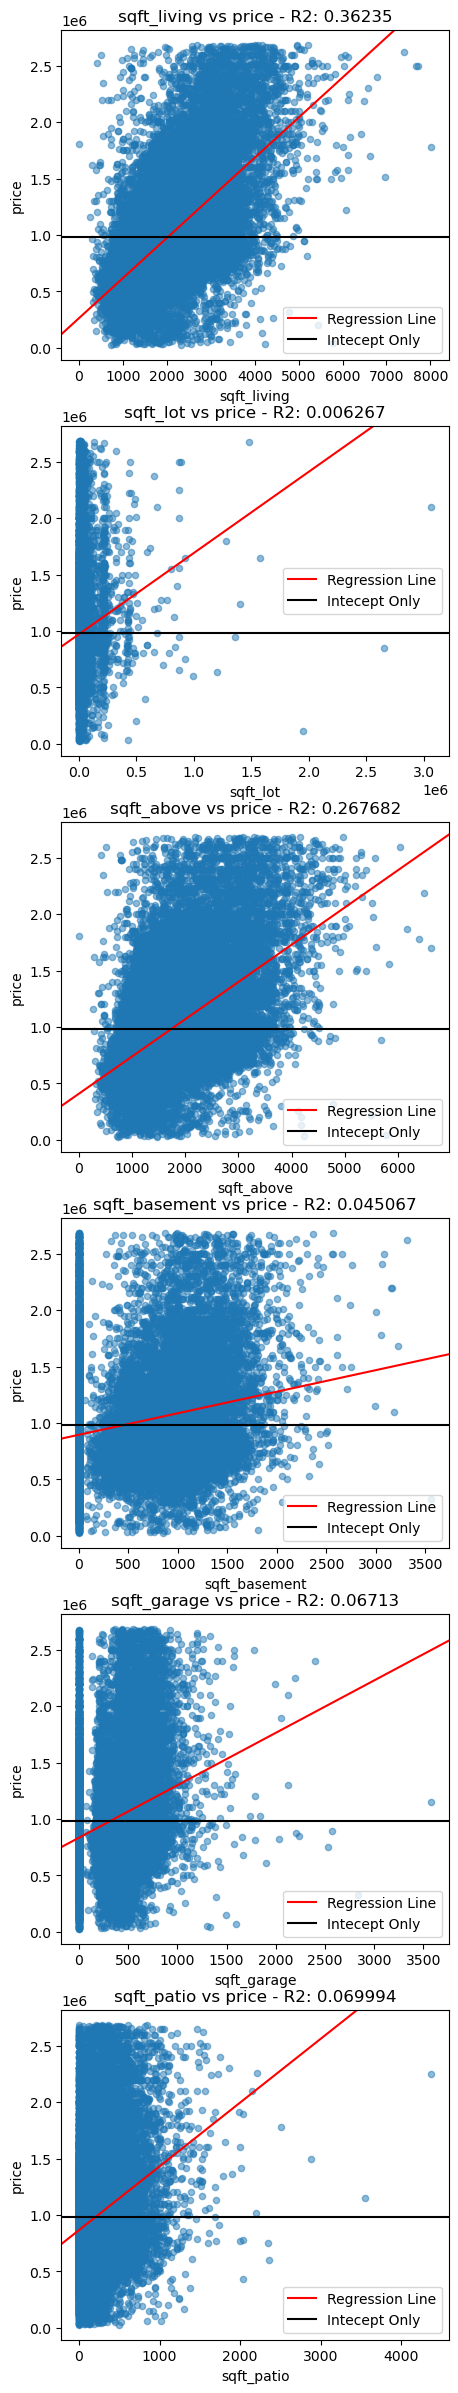

In [25]:
## Seperate the contiuous data type with the categorical data type for modelling and prepping
df_prepped_continuous = df_cleaned[continuous].copy()
categorical.append('price')
df_prepped_categorical = df_cleaned[categorical].copy()

models = []
results = []
for column in continuous:
    model, result = helpers.dp.create_model(df_prepped_continuous, column, 'price')
    models.append(model)
    results.append(result)
fig, ax = helpers.dv.plot_dataframe(df_prepped_continuous, continuous[1:], 'price',  size = (5,30), regression= True, results= results[1:]);

#### Categorical Data Type

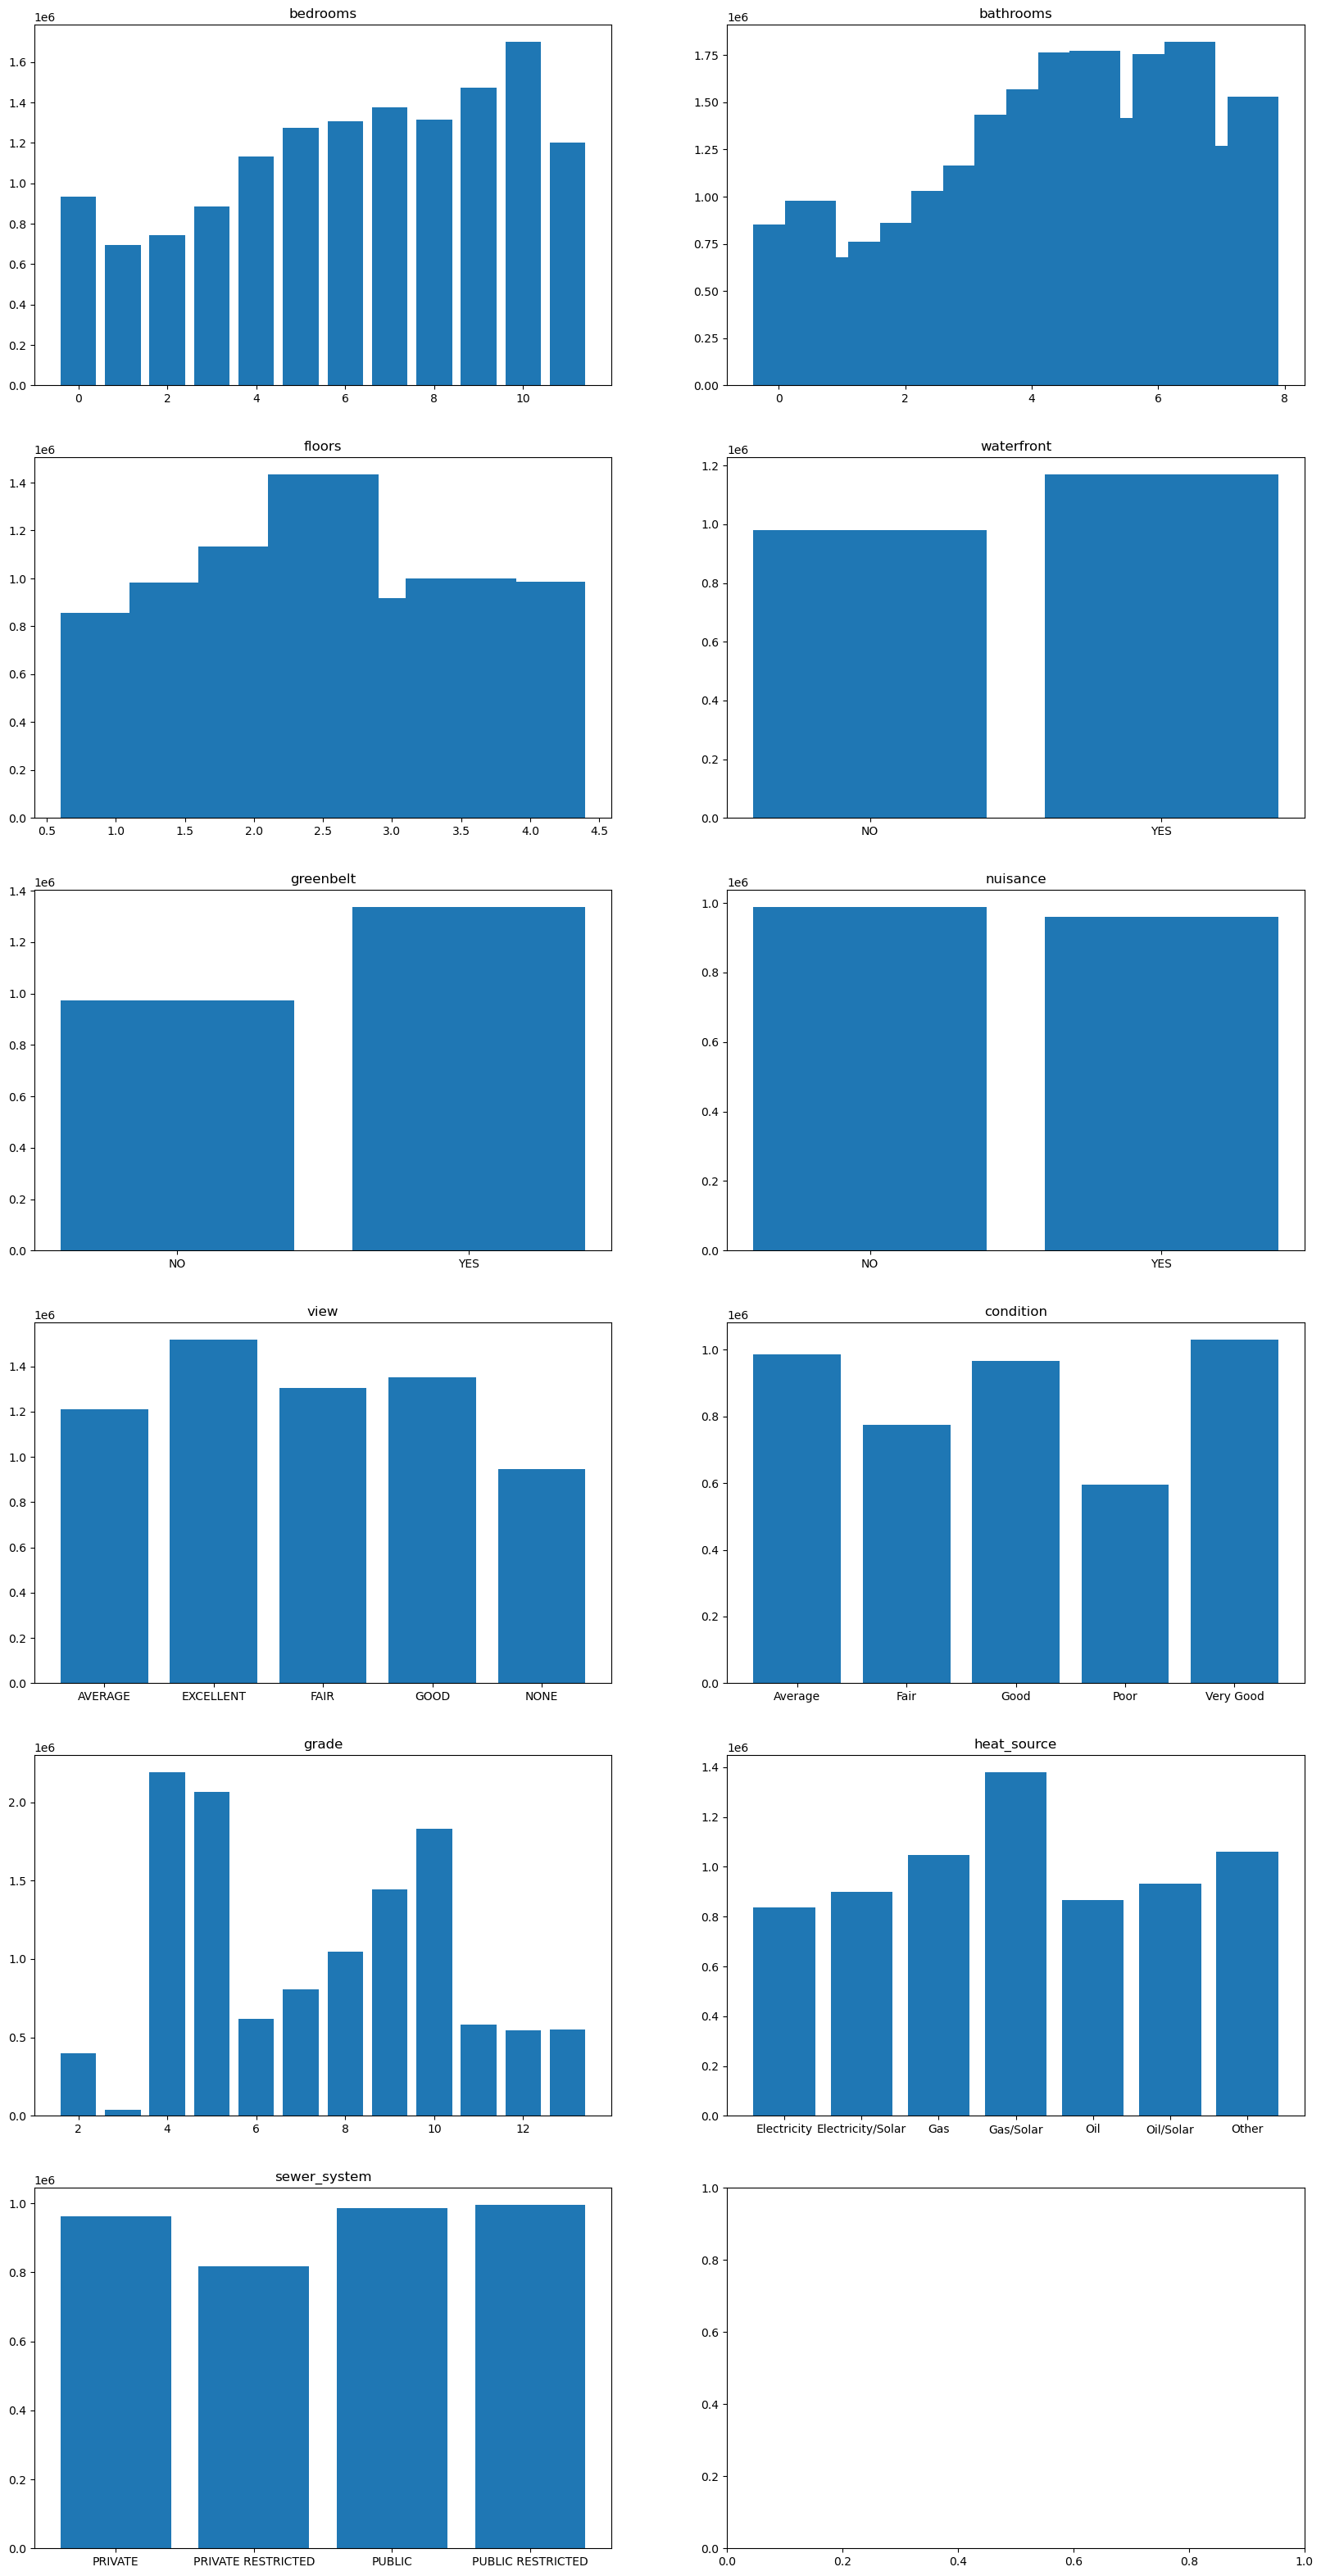

In [26]:
fig, ax = plt.subplots(ncols= 2, nrows = 6, figsize = (20,40))
row = 0 
col = 0
for category in categorical[0:-1]:
    group = df_cleaned[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[row][col].bar((group.index), x_group)
    ax[row][col].set_title(category)
    df_cleaned[category].value_counts()
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1

## Data Preperation 2

### Categorical adjustment
There are observation that have very few observation so I will group them up as 'others'. This is only applied to the categorical dataype. <br>
For the numerical observation with few observations, they will be plotted in bar graphs

Results: A house cost more if they are at the waterfront or at a greenbelt. There is a general price increase with the higher conditon and view <br>
None Impactful: Nuisance, whether there is any or not, seems to have no effect on price to make a difference. <br>
Potential Impactful: Heat Source and sewer may have some influence but doesn't seems to be a strong one.  <br>

df_dummy_other: df_obj_cat with dummy variables and have fewer observation binned to others

In [27]:
## All categories and the number of times they appear
for column in list(df_obj_cat.columns[0:-1]):
    replace = df_obj_cat[column].value_counts()[df_obj_cat[column].value_counts()< 300].index
    df_obj_cat[column].replace(replace, value= 'other',inplace= True)

## New Models

### Categorical 

In [28]:
df_dummy_other = pd.get_dummies(df_obj_cat, drop_first= True)
X = df_dummy_other[df_dummy_other.columns[1:]]
y = df_dummy_other['price']
model_cat_all = sm.OLS(y, sm.add_constant(X))
result_cat_all = model_cat_all.fit()
print(result_cat_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     218.5
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:52:05   Log-Likelihood:            -4.1833e+05
No. Observations:               28896   AIC:                         8.367e+05
Df Residuals:                   28880   BIC:                         8.368e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.086e+06   1

## Data Visiualization

### Data Prepartion - Object Categories
Group means by their respective quality

In [29]:
group_waterfront = df_obj_cat[['waterfront', 'price']].groupby('waterfront').mean().values
x_group1 = [value[0] for value in group_waterfront.tolist()]
group_greenbelt = df_obj_cat[['greenbelt', 'price']].groupby('greenbelt').mean().values
x_group2 = [value[0] for value in group_greenbelt.tolist()]
group_nuisance = df_obj_cat[['nuisance', 'price']].groupby('nuisance').mean().values
x_group3 = [value[0] for value in group_nuisance.tolist()]

### Data Visiualization - Object Categories
**Shows that Waterfront and Greenbelt are the only beneficial Attributes for these category**

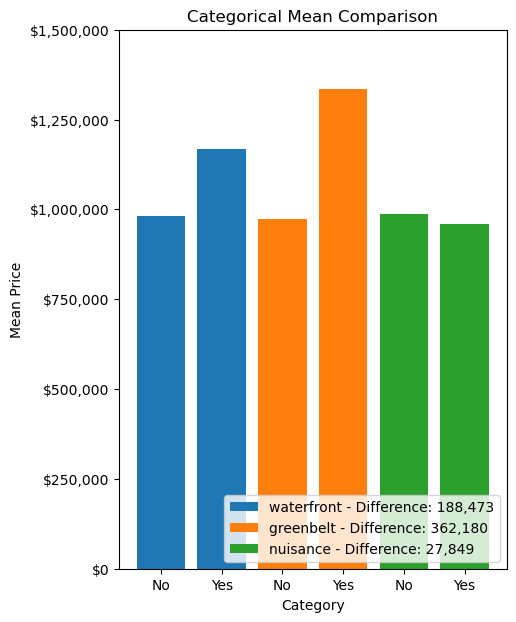

In [30]:
fig, ax = plt.subplots(figsize = (5, 7));    # Setup for plotting 
label = ['waterfront', 'greenbelt', 'nuisance']    #Labels for the legend and labels
r = np.arange(2)    # Spacing for the bar plots
width = 2    # Basic width of each bar
index = 0    # Index through all the groups

### Plot each of the groups side by side for clarity
for group in [x_group1, x_group2, x_group3]:
    ax.bar(r + width * index, group, label = '{} - Difference: {:,}'.format(label[index], abs(round(group[1]-group[0]))));
    index += 1
### Ticks labeling and spacing 
x_ticks = np.arange(6)    
y_ticks = np.arange(0,1750000, 250000)
y_ticks_str = ['${:,}'.format(y) for y in y_ticks]

plt.title('Categorical Mean Comparison');
plt.xlabel('Category')
plt.ylabel('Mean Price');
plt.xticks(x_ticks, ['No','Yes','No','Yes','No','Yes']);

ax.set_yticks(np.arange(0,1750000, 250000));
ax.set_yticklabels(y_ticks_str);

plt.legend(loc = 'lower right');

### Data Prepartion - Numeric Categories

In [31]:
## All categories and the number of times they appear
other_num_cat = df_num_cat.copy()
for column in list(other_num_cat.columns[0:-1]):  
    replace = other_num_cat[column].value_counts()[other_num_cat[column].value_counts()< 300].index
    other_num_cat[column].replace(replace, value= -1,inplace= True)

### Data Visiualization - Numeric Categories
****

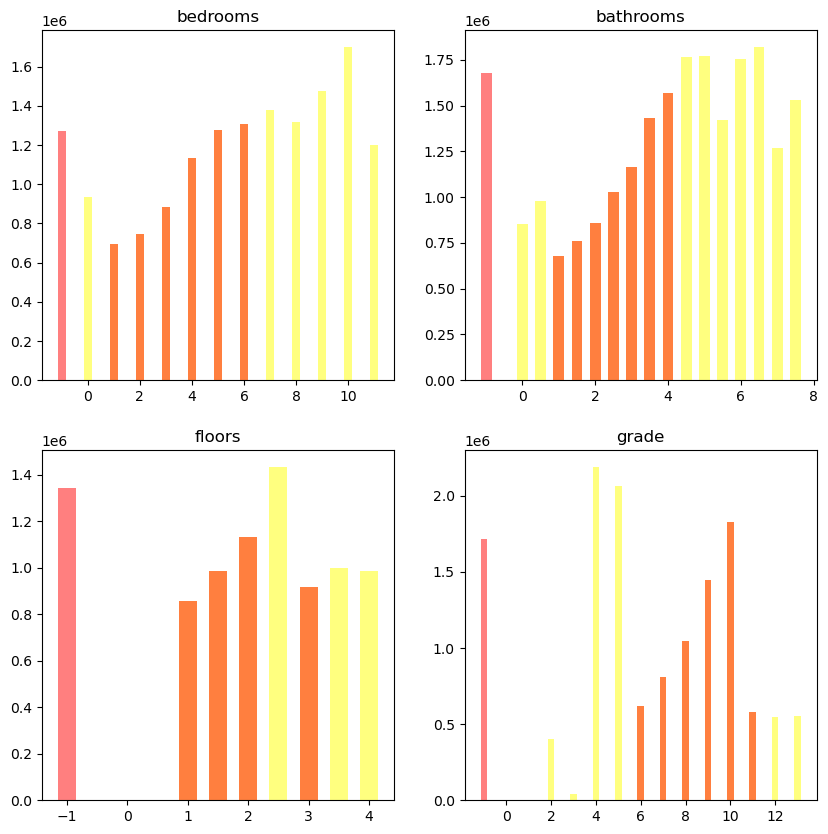

In [32]:
fig, ax = plt.subplots(ncols= 2, nrows = 2, figsize = (10,10))
row = 0 
col = 0

for category in df_num_cat.columns[0:4]:
    group = df_num_cat[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[row][col].bar((group.index), x_group, width = .3, alpha = .5, color = 'yellow')
    ax[row][col].set_title(category)
    
    group = other_num_cat[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[row][col].bar((group.index), x_group, width = .3, alpha = .5, color= 'red')
    ax[row][col].set_title(category)
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1

In [33]:
df_all_obj_num = pd.concat([df_num[df_num.columns[1:]],df_dummy_other[df_dummy_other.columns[1:]]],axis = 1)
X_all = df_all_obj_num[list(df_all_obj_num.columns[1:])]
y = df_dummy['price']

model_all_num_obj = sm.OLS(y, sm.add_constant(X_all))
results_all_num_obj = model_all_num_obj.fit()
print(results_all_num_obj.summary())

df_all_obj_num = pd.concat([df_num[df_num.columns[1:]],df_dummy[df_dummy.columns[1:]]],axis = 1)
X_all = df_all_obj_num[list(df_all_obj_num.columns[1:])]
y = df_dummy['price']
model_all_num_obj = sm.OLS(y, sm.add_constant(X_all))
results_all_num_obj = model_all_num_obj.fit()
print(results_all_num_obj.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     867.4
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:52:06   Log-Likelihood:            -4.1154e+05
No. Observations:               28896   AIC:                         8.231e+05
Df Residuals:                   28869   BIC:                         8.234e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.246e+06   2

## Results

### 1. Original Continuous Model Vs Cleaned Continuous Model
Original has most of the original with only the removing of outliers and unnecessary data. <br>
Cleaned has filtered that data so that it only has the given categories

In [34]:
print(result_all.summary())   ## Original continuous model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     2191.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:52:06   Log-Likelihood:            -4.1236e+05
No. Observations:               28896   AIC:                         8.247e+05
Df Residuals:                   28886   BIC:                         8.248e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.697e+05   1.86e+04    -14.495

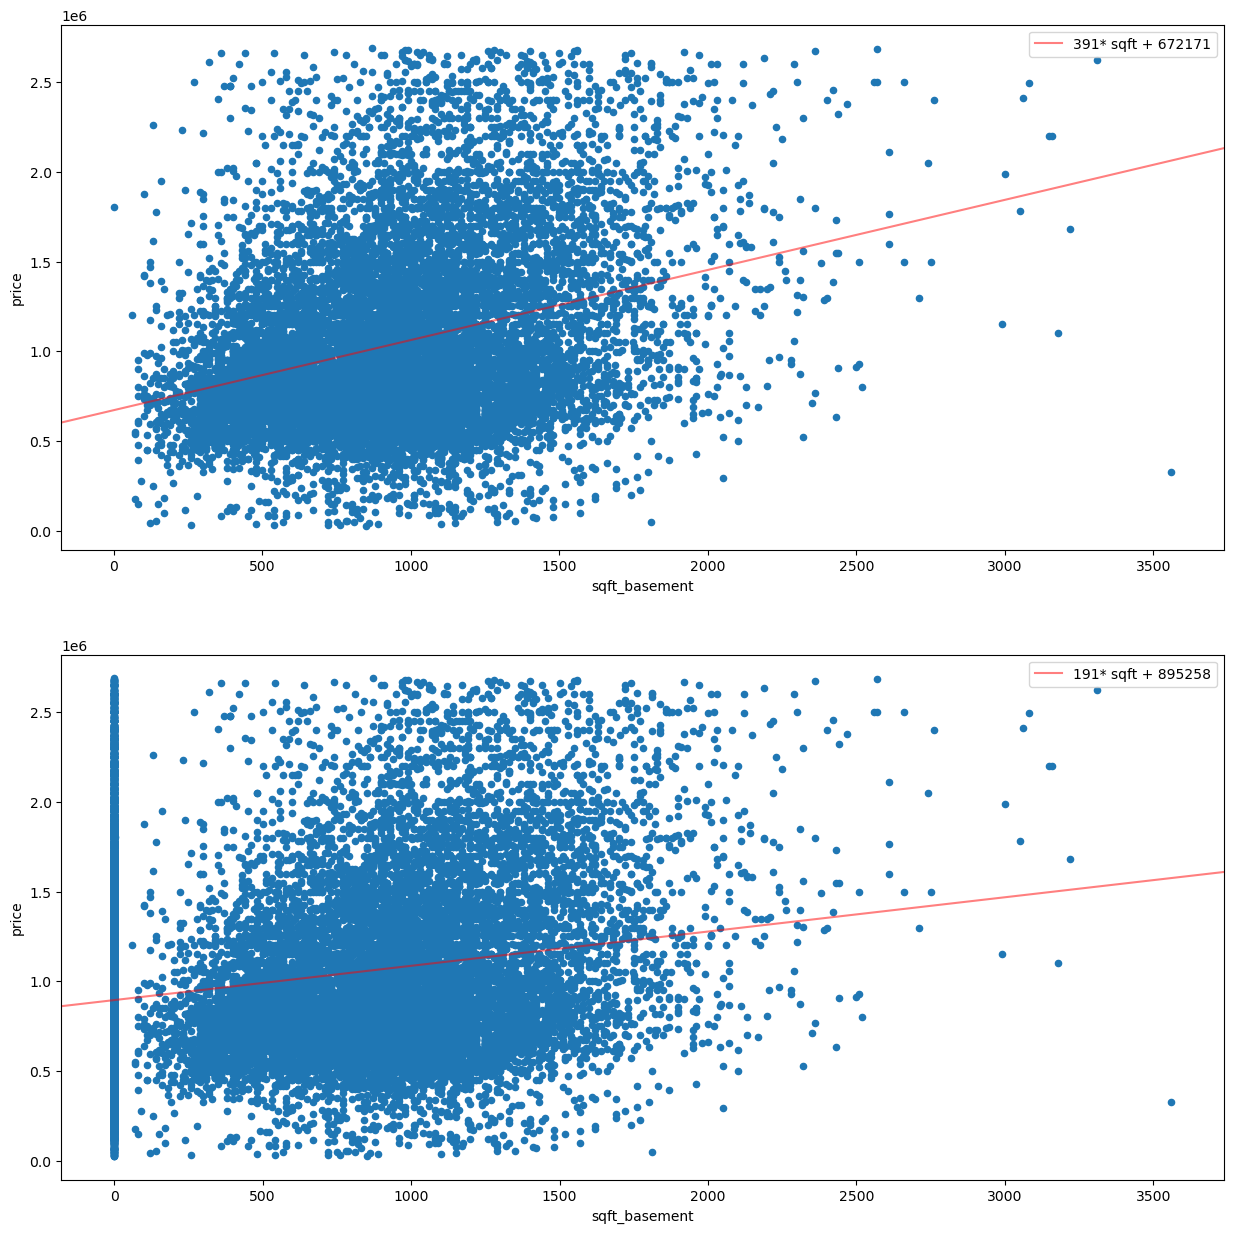

In [35]:
df_basement_0s = df_cleaned.loc[df_cleaned['sqft_basement'] != 0]#.plot.scatter('sqft_basement', y = 'price')
model, result = helpers.dp.create_model(df_basement_0s, 'sqft_basement', 'price')
model2, result2 = helpers.dp.create_model(df_cleaned, 'sqft_basement', 'price')


fig, ax = plt.subplots(nrows= 2, figsize = (15,15))
df_cleaned.loc[df_cleaned['sqft_basement'] != 0].plot.scatter('sqft_basement', y = 'price', ax = ax[0])
sm.graphics.abline_plot(model_results= result , c = 'r', ax = ax[0], alpha = .5, label = '{}* sqft + {}'.format(round(result.params[1]), round(result.params[0])));
ax[0].legend()

df_cleaned.plot.scatter('sqft_basement', y = 'price', ax = ax[1])
sm.graphics.abline_plot(model_results= result2, c = 'r', ax = ax[1], alpha = .5, label = '{}* sqft + {}'.format(round(result2.params[1]), round(result2.params[0])));
ax[1].legend()

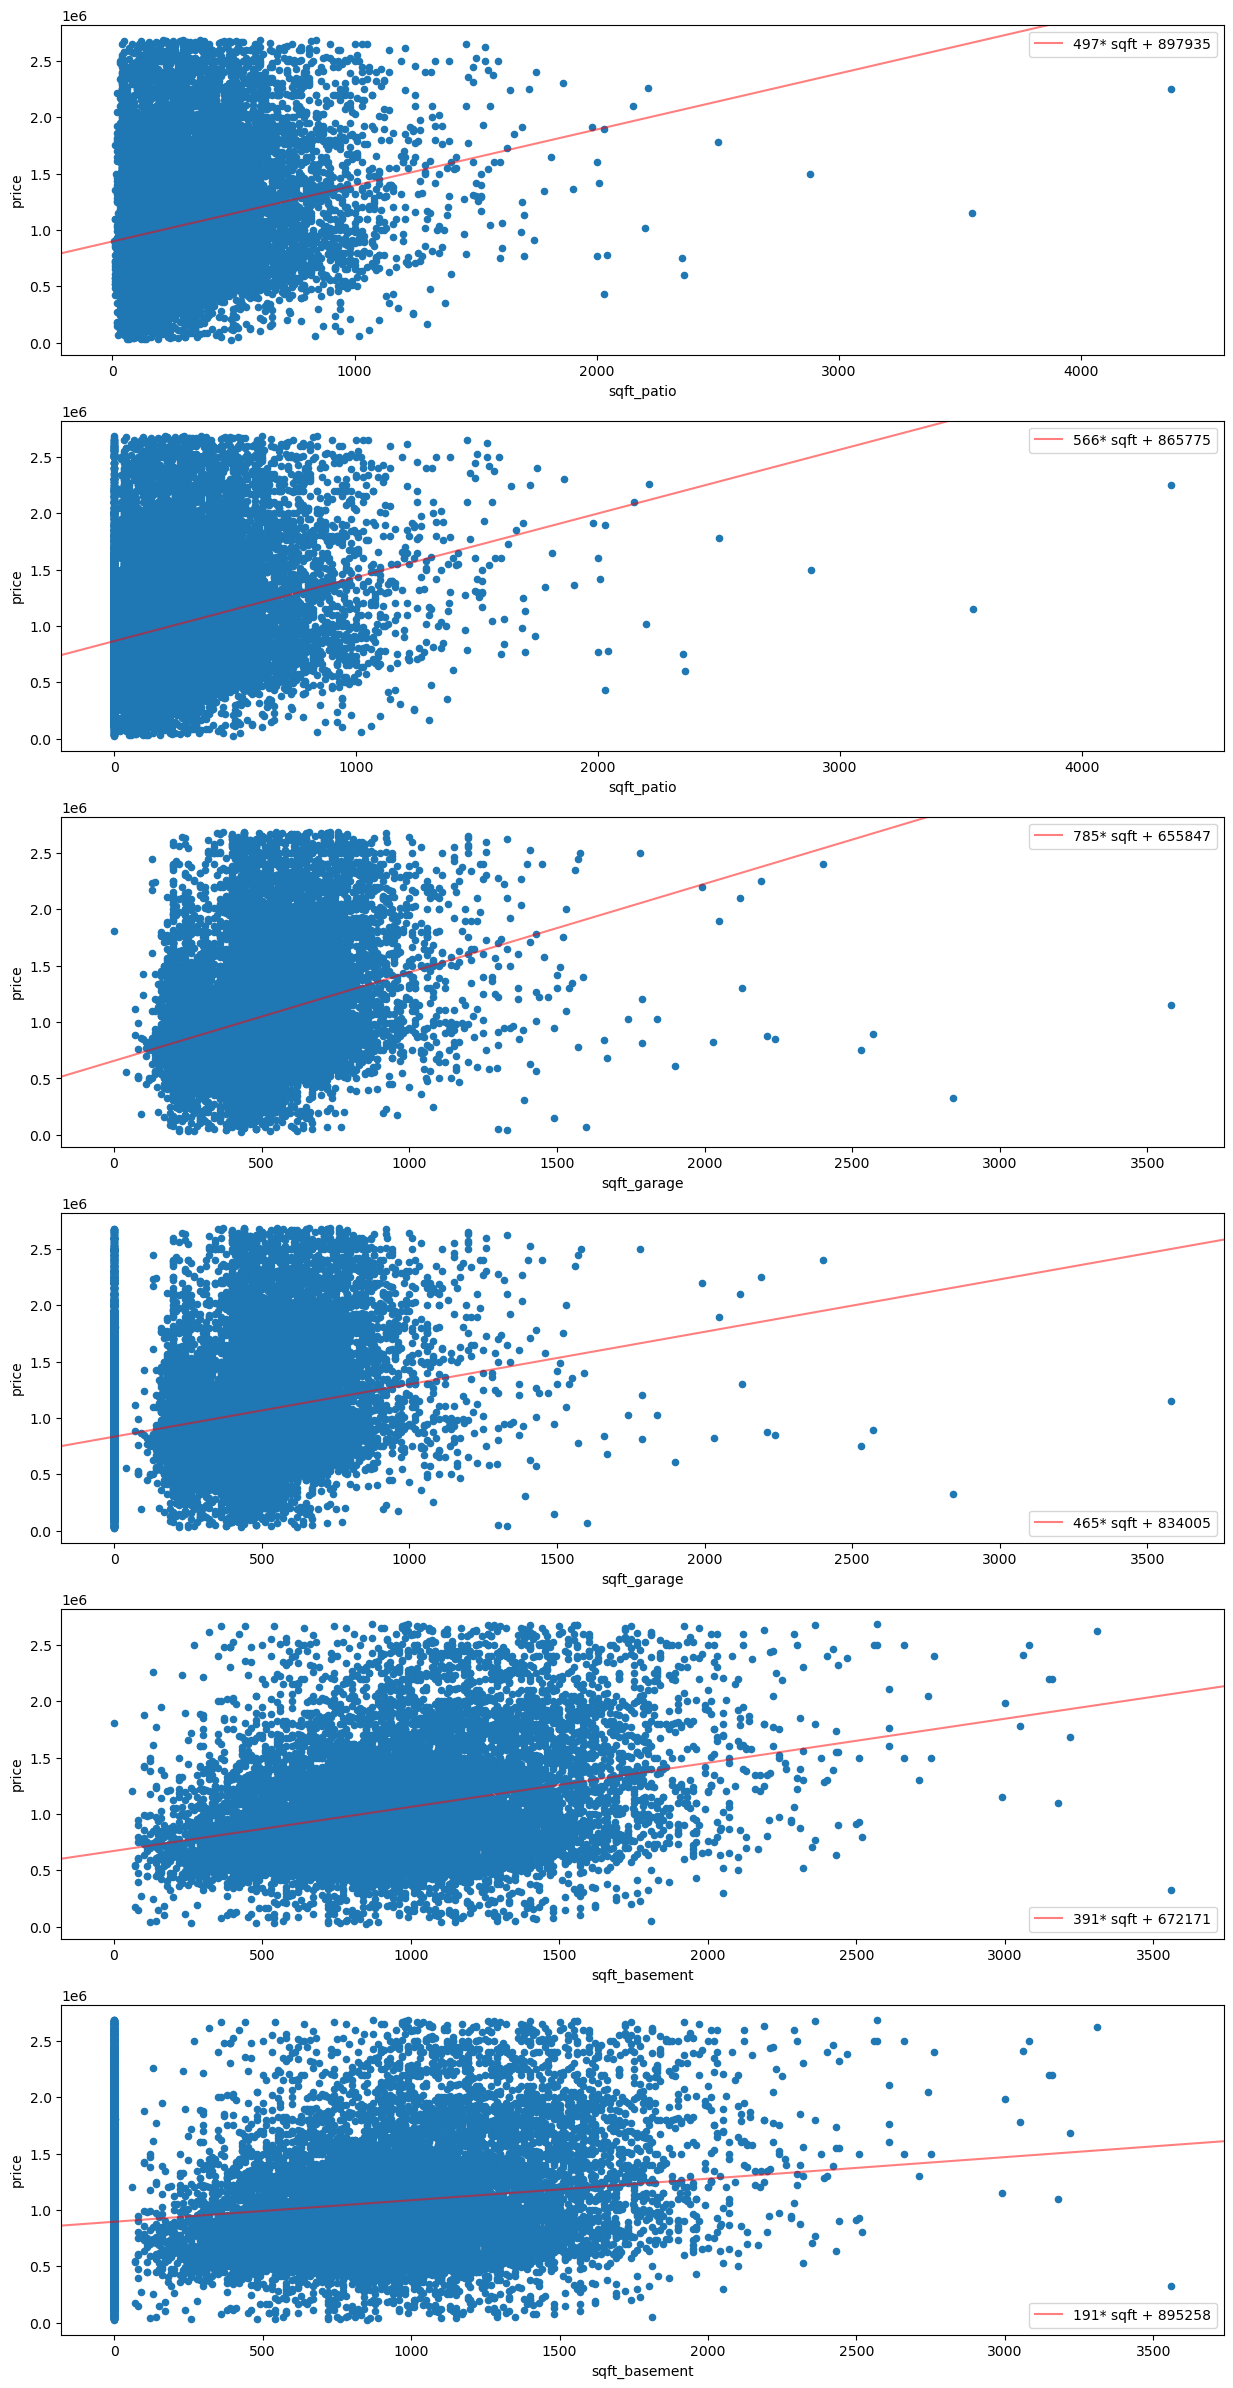

In [36]:
models_sqft = {}
fig, ax = plt.subplots(nrows= 6, figsize = (15,30))
index = 0
for category in ['sqft_patio', 'sqft_garage', 'sqft_basement']:
    df_filtered = df_cleaned.loc[df_cleaned[category] != 0]#.plot.scatter('sqft_basement', y = 'price')
    
    model, result = helpers.dp.create_model(df_filtered, category, 'price')
    model2, result2 = helpers.dp.create_model(df_cleaned, category, 'price')
    
    models_sqft[category] = model;
    
    df_filtered.plot.scatter(category, y = 'price', ax = ax[index])
    sm.graphics.abline_plot(model_results= result , c = 'r', ax = ax[index], alpha = .5, label = '{}* sqft + {}'.format(round(result.params[1]), round(result.params[0])));
    ax[index].legend()

    df_cleaned.plot.scatter(category, y = 'price', ax = ax[index +1 ])
    sm.graphics.abline_plot(model_results= result2, c = 'r', ax = ax[index + 1], alpha = .5, label = '{}* sqft + {}'.format(round(result2.params[1]), round(result2.params[0])));
    ax[index + 1].legend()

    index += 2

In [37]:
for category in ['sqft_patio', 'sqft_garage', 'sqft_basement']:
    df_filtered = df_cleaned.loc[df_cleaned[category] != 0]
    df_filtered_no = df_cleaned.loc[df_cleaned[category] == 0]
    print(df_filtered['price'].mean(), df_filtered_no['price'].mean())

1031465.2627107215 820319.5495414224
1034587.7574887798 881047.8204232587
1043096.087710498 926610.279700154


In [38]:
df_cleaned['floors'].value_counts()

1.0    13686
2.0    11438
1.5     2387
3.0     1166
2.5      174
4.0       30
3.5       15
Name: floors, dtype: int64

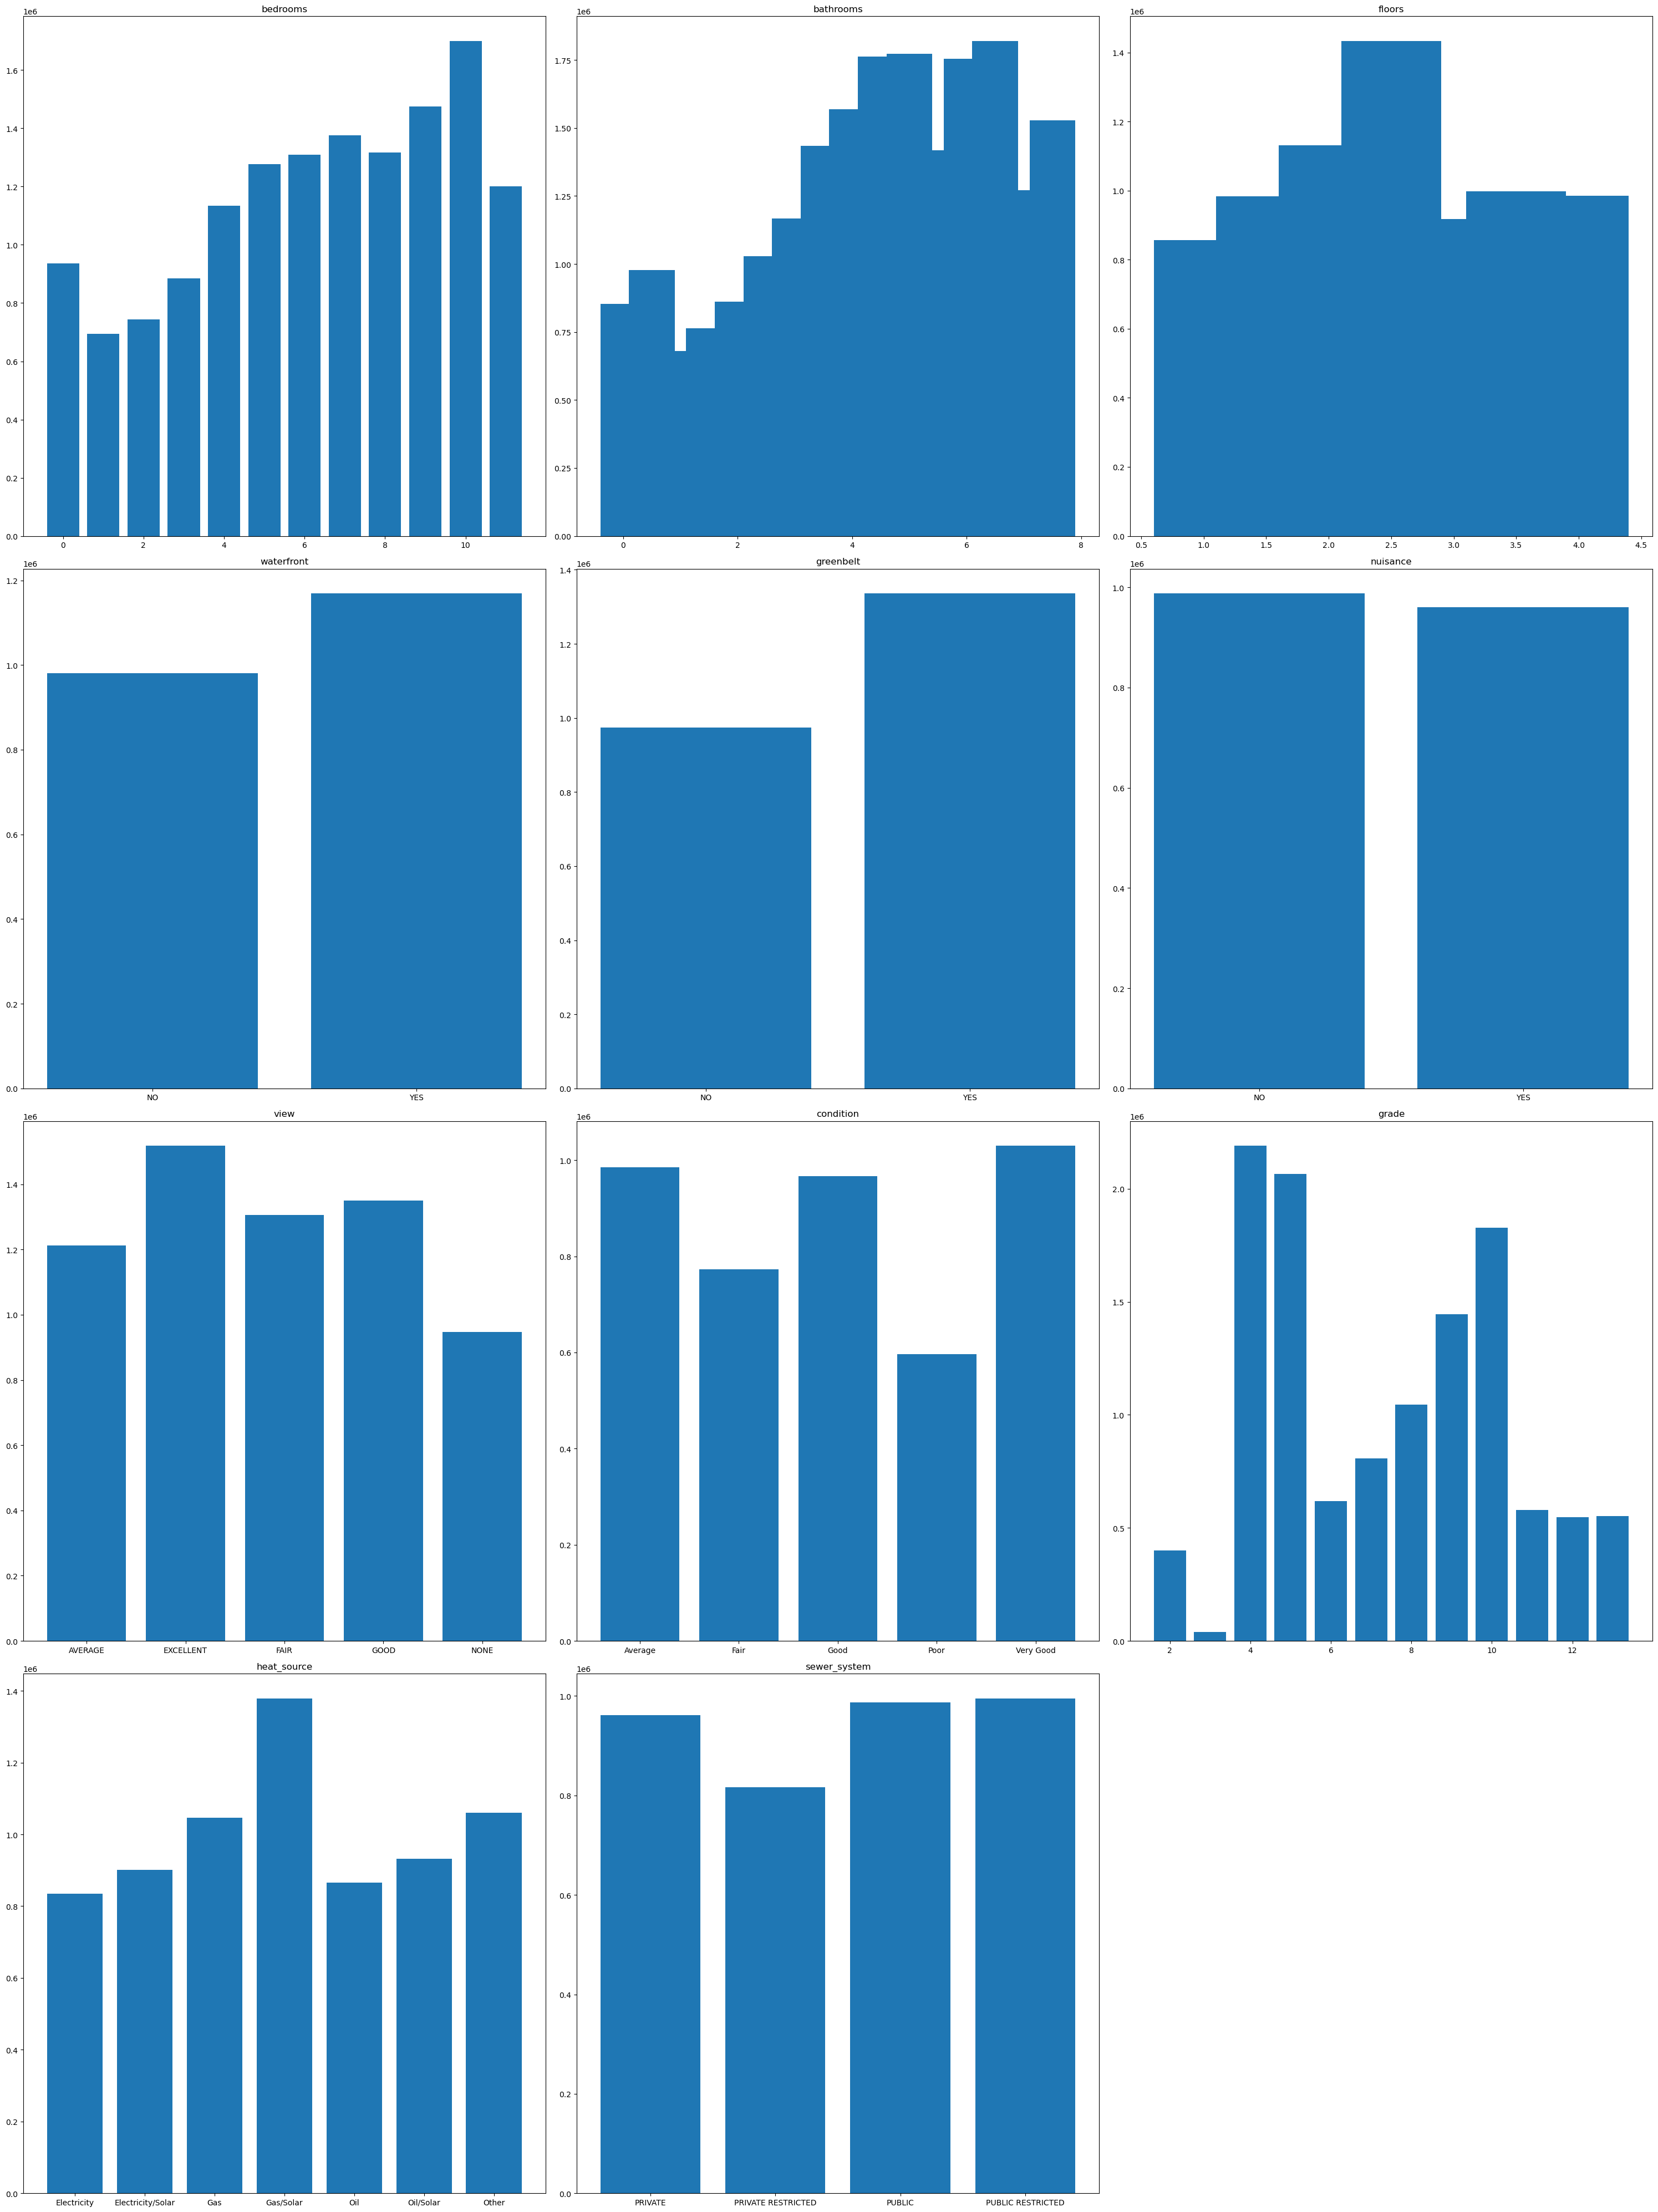

In [39]:
fig, ax = plt.subplots(ncols= 3, nrows = 4, figsize = (30,40))
row = 0 
col = 0
delete = []
for category in categorical[0:-1]:

    group = df_cleaned[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[row][col].bar((group.index), x_group)
    ax[row][col].set_title(category)
    df_cleaned[category].value_counts()
    if col == 2:
        row += 1
        col = 0
    else:
        col += 1
fig.delaxes(ax[3][2])
plt.tight_layout()

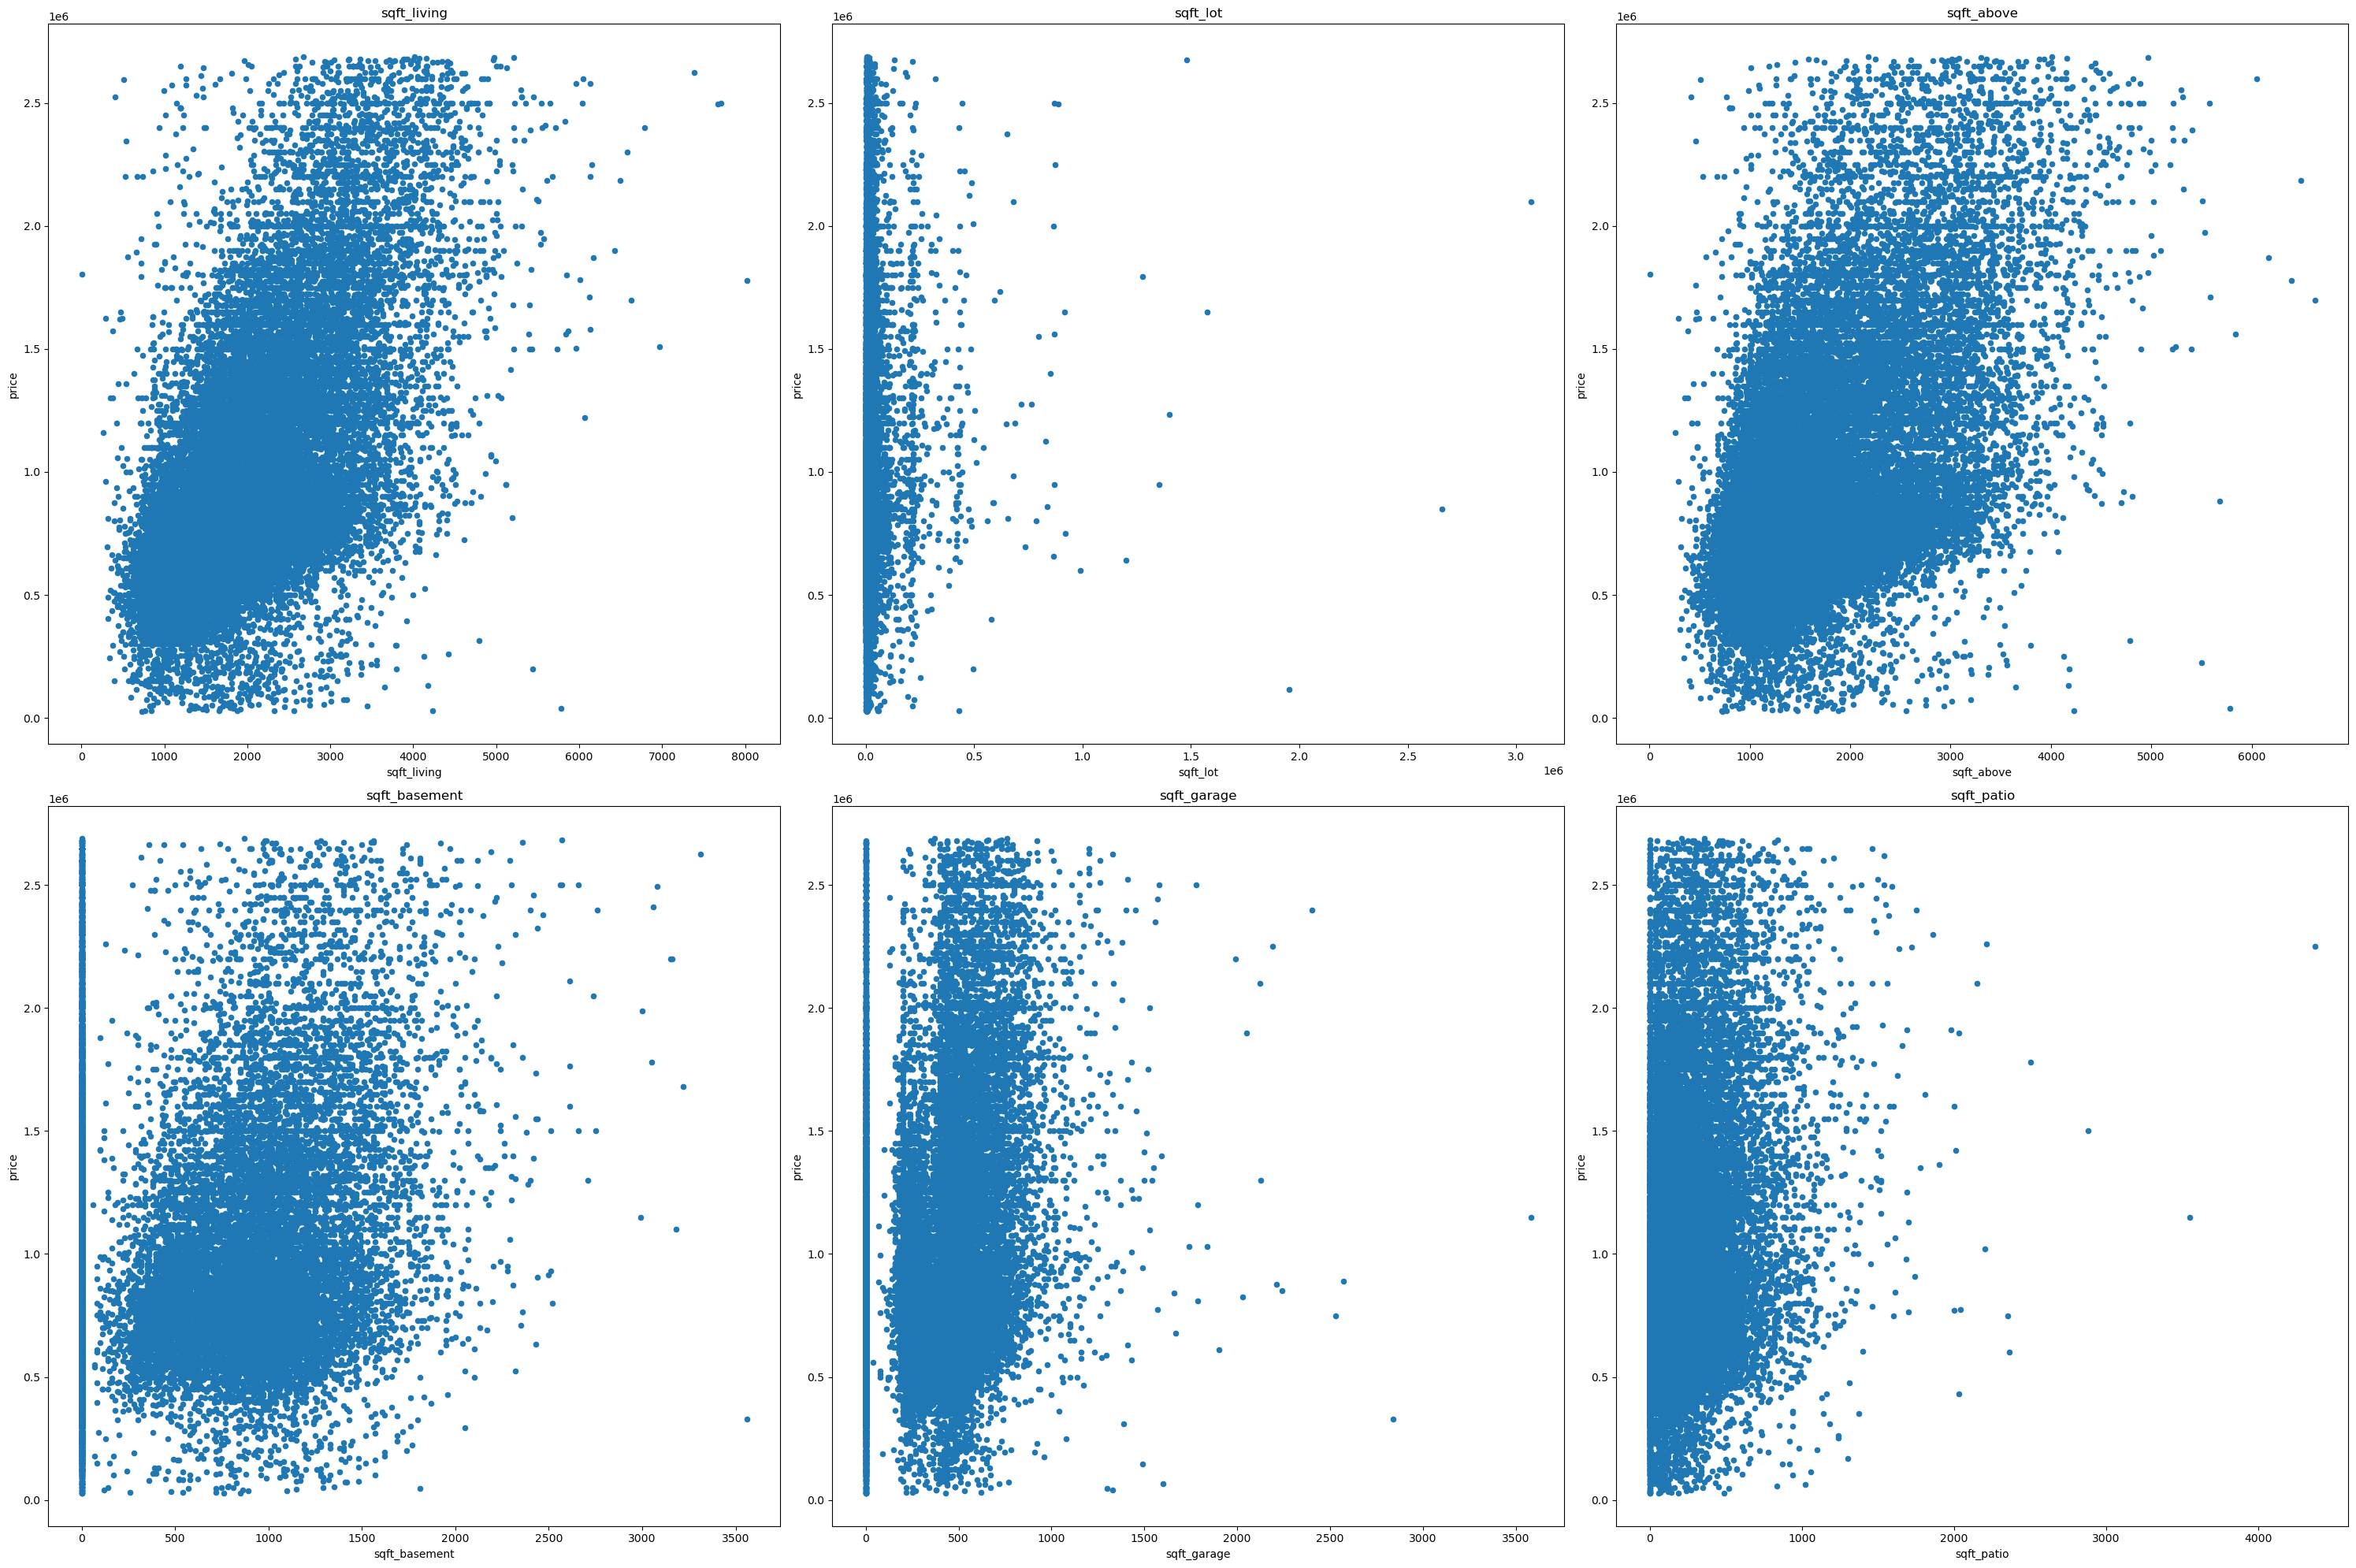

In [40]:
fig, ax = plt.subplots(ncols= 3, nrows = 2, figsize = (30,20))
row = 0 
col = 0
delete = []
for variable in continuous[1:]:

    df_cleaned.plot.scatter(x = variable, y = 'price', ax = ax[row][col])
    ax[row][col].set_title(variable)
    if col == 2:
        row += 1
        col = 0
    else:
        col += 1

plt.tight_layout()

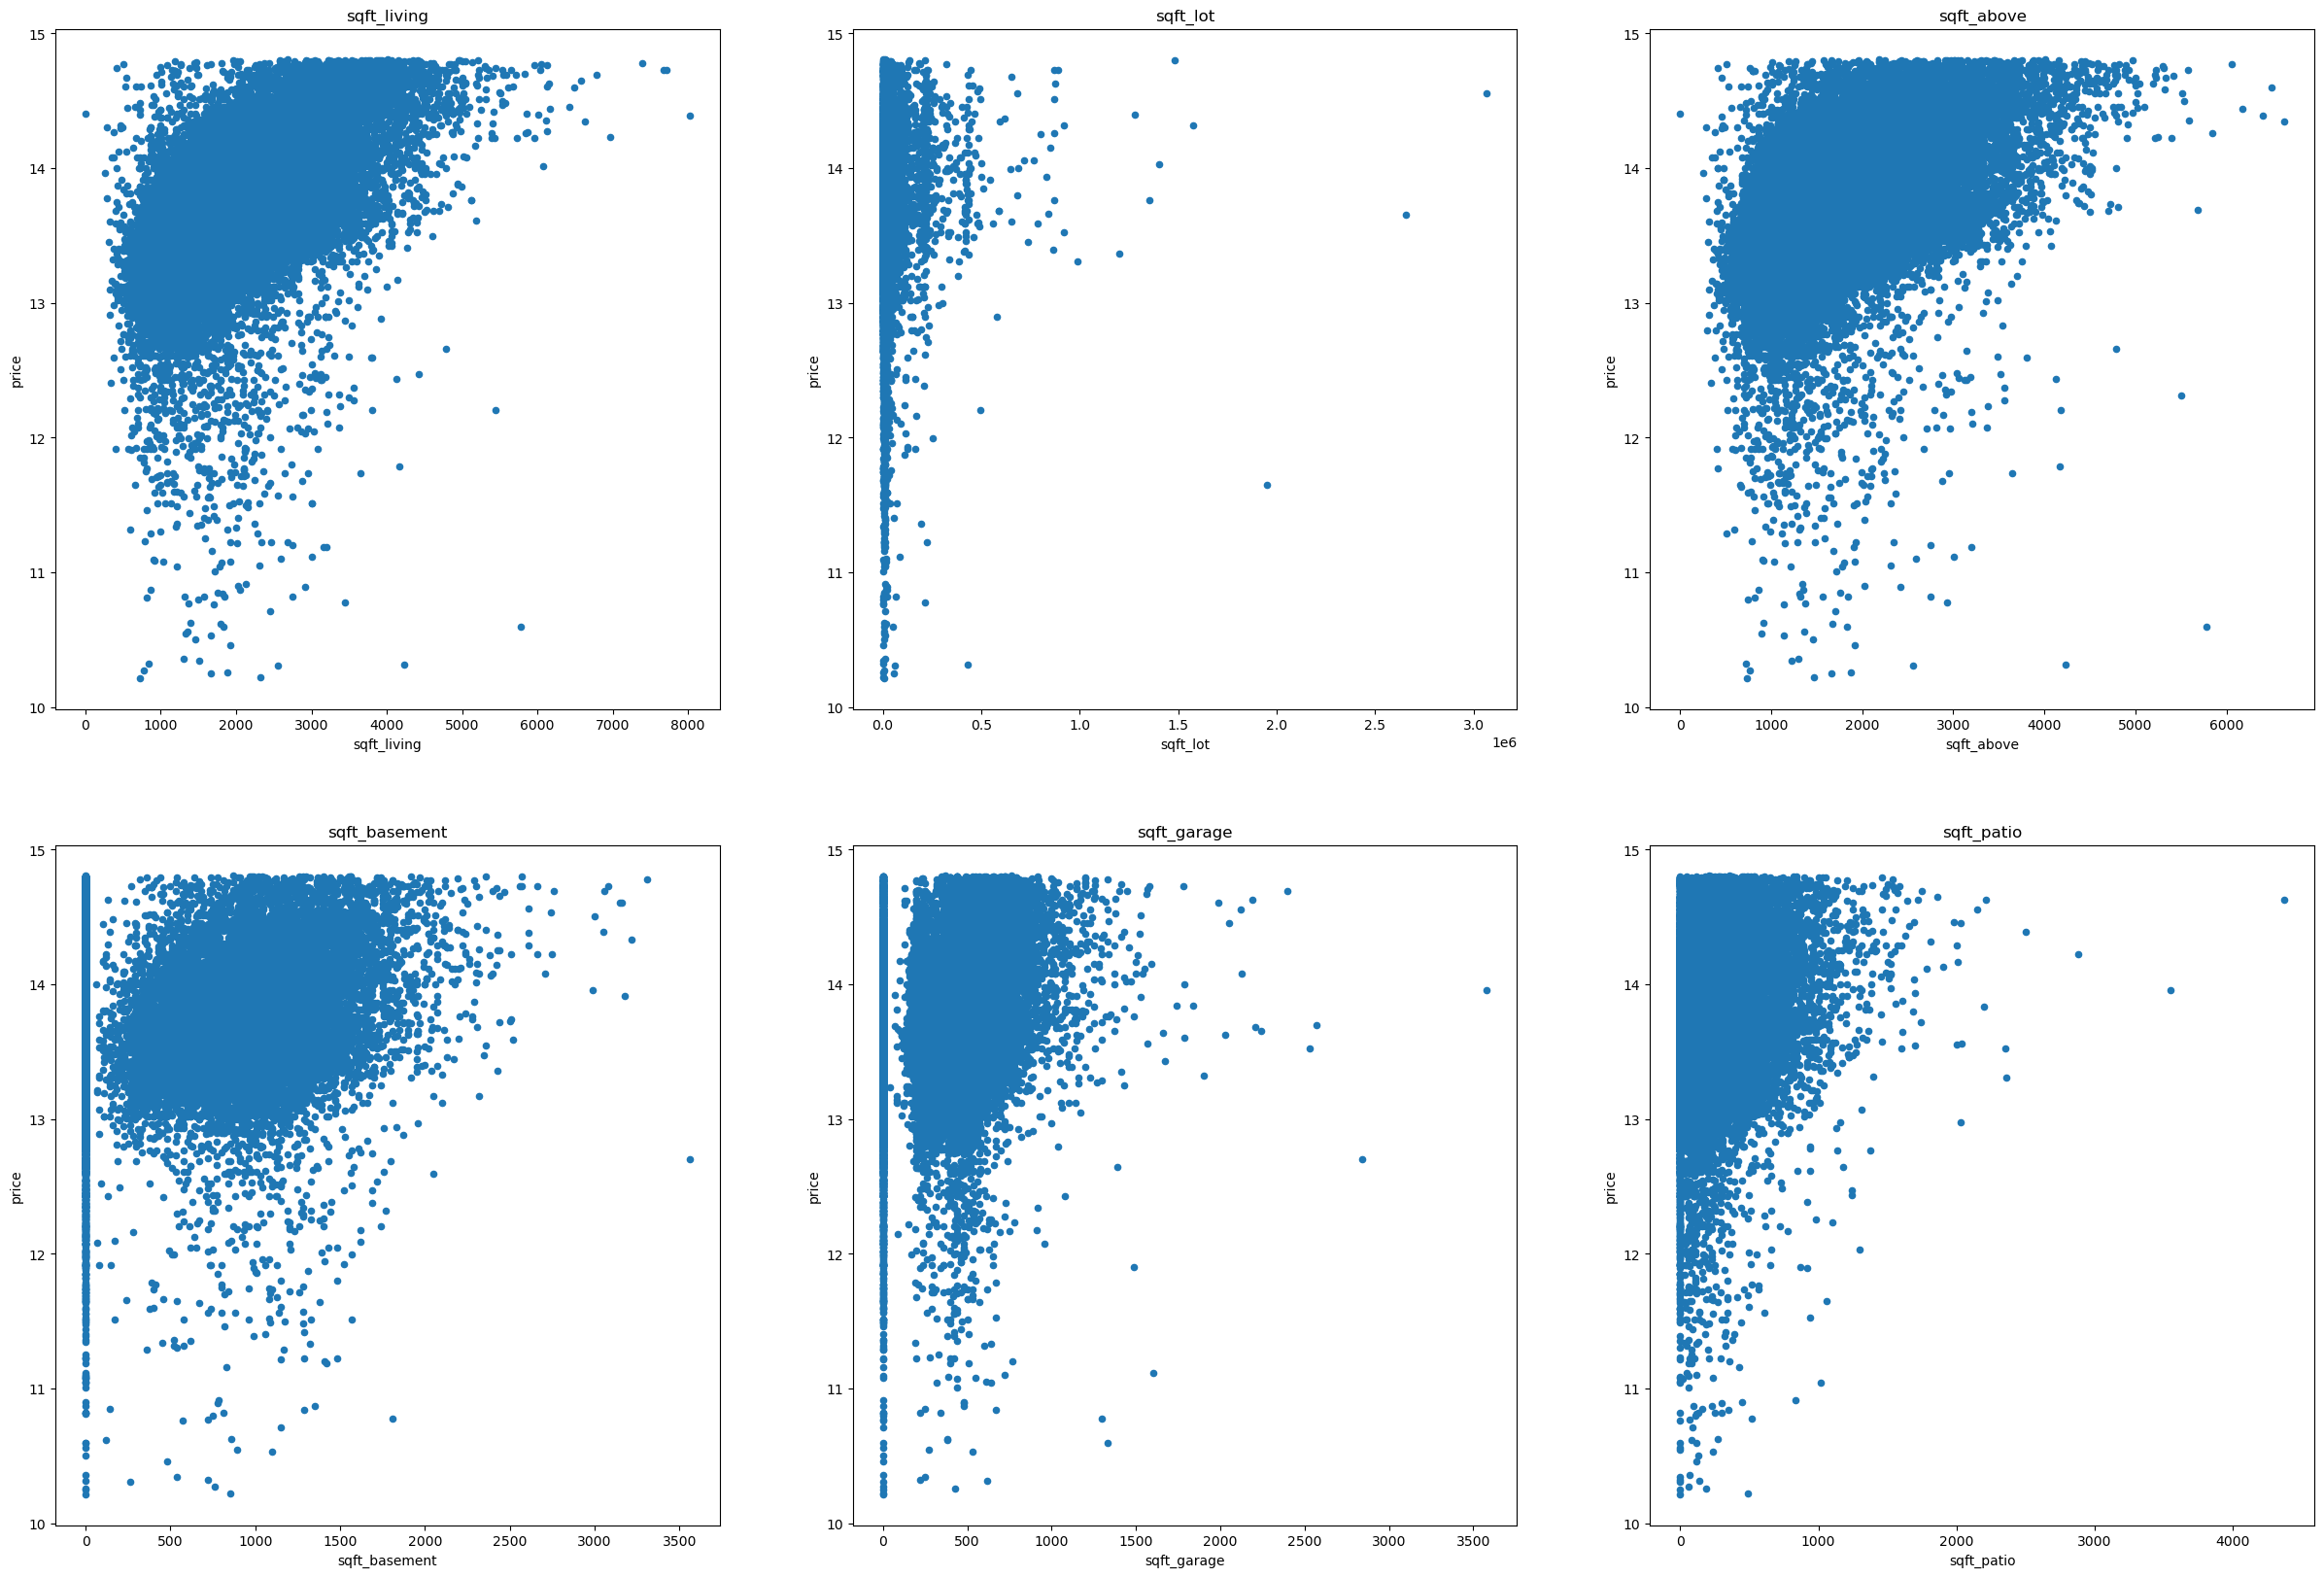

In [41]:
fig, ax = plt.subplots(ncols= 3, nrows = 2, figsize = (30,20))
row = 0 
col = 0
delete = []
df_cleaned_log = helpers.de.apply_log(df_cleaned, ['price'])
for variable in continuous[1:]:

    df_cleaned_log.plot.scatter(x = variable, y = 'price', ax = ax[row][col])
    ax[row][col].set_title(variable)
    if col == 2:
        row += 1
        col = 0
    else:
        col += 1

#plt.tight_layout()

In [42]:
df_log = helpers.de.apply_log(df_cleaned ,['sqft_living', 'price'])
X = df_log['sqft_living']    #One variable 
y = df_log['price']    # Always with price as dependent
model_living_log = sm.OLS(y, sm.add_constant(X))
result_living_log = model_living_log.fit()
print(result_living_log.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                 1.175e+04
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:52:12   Log-Likelihood:                -16608.
No. Observations:               28896   AIC:                         3.322e+04
Df Residuals:                   28894   BIC:                         3.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.7483      0.046    192.184      

In [43]:
df_final_dummies['grade*price5'] = df_final_dummies['price'] * df_final_dummies['grade_5']
df_final_dummies['grade*price6'] = df_final_dummies['price'] * df_final_dummies['grade_6']
df_final_dummies['grade*price7'] = df_final_dummies['price'] * df_final_dummies['grade_7']
df_final_dummies['grade*price8'] = df_final_dummies['price'] * df_final_dummies['grade_8']
df_final_dummies['grade*price9'] = df_final_dummies['price'] * df_final_dummies['grade_9']
df_final_dummies['grade*price_o'] = df_final_dummies['price'] * df_final_dummies['grade_other']

NameError: name 'df_final_dummies' is not defined

In [ ]:
X = df_final_dummies[df_final_dummies.columns[1:]]
y = df_final_dummies['price']
model_dummies = sm.OLS(y, sm.add_constant(X))
results_dummies = model_dummies.fit()
print(results_dummies.summary())
print(results_dummies.params)

In [49]:
df_cleaned[['price', 'grade', 'sqft_living']].groupby('grade').mean()

,price,sqft_living
grade,,
2,4.000000e+05,760.000000
3,4.000000e+04,5780.000000
4,2.189644e+06,4779.000000
5,2.065362e+06,4132.079268
6,6.189848e+05,1212.096501
7,8.082068e+05,1727.093618
8,1.045926e+06,2207.934109
9,1.443957e+06,2816.654725
10,1.827856e+06,3517.019588


In [ ]:
df_interaction = df_final_dummies.copy()
df_interaction['grade2*living'] = df_interaction['grade_2'] * df_interaction['sqft_living']
df_interaction['grade4*living'] = df_interaction['grade_4'] * df_interaction['sqft_living']
df_interaction['grade5*living'] = df_interaction['grade_5'] * df_interaction['sqft_living']
df_interaction['grade7*living'] = df_interaction['grade_7'] * df_interaction['sqft_living']
df_interaction['grade8*living'] = df_interaction['grade_8'] * df_interaction['sqft_living']
df_interaction['grade9*living'] = df_interaction['grade_9'] * df_interaction['sqft_living']
df_interaction['grade13*living'] = df_interaction['grade_13'] * df_interaction['sqft_living']

In [ ]:
X = df_interaction[['sqft_living', 'greenbelt_YES', 'sqft_garage', 'grade_11', 'grade_12', 'grade_13',
       'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7','grade_8', 'grade_9', 'grade2*living', 'grade4*living',
       'grade5*living', 'grade7*living', 'grade8*living','grade9*living', 'grade13*living']]
y = df_interaction['price']
model_dummies = sm.OLS(y, sm.add_constant(X))
results_dummies = model_dummies.fit()
print(results_dummies.summary())

In [50]:
df_cleaned[['yr_built', 'sqft_living']]

,yr_built,sqft_living
0,1969,1180
1,1950,2770
2,1956,2880
3,2010,2160
4,2012,1120
...,...,...
30150,1921,1910
30151,2011,2020
30152,1995,1620
30153,2006,2570
